Removes duplicate entries in the Annotation dataset

Note that there are two duplicate entries in the Gold Standard Dataset

In [1]:
import numpy as np
import torch
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

sns.set(context="talk", style="darkgrid")

# load the dataframe

In [2]:
CWD = os.getcwd()
folder = "data"
file = "Annotationen-Stufe-2.txt"

path = "/".join( (CWD, folder, file) )

df = pd.read_csv(path, index_col=0)
df.drop(["Seite", "Unnamed: 2",
         "Semantikerweiterung?",
         "Unersetzlich?",
         "Unersetzlich?",
         "sprachlich irregulär?",
         "Stärkegrad (A, B, C)",
         "pointiert?"], axis = 1, inplace = True) # 2x Floskel

df = df[~df.Textstelle.isnull()]
df

,Textstelle,Metapher?,Fokus,Rahmen,Begründung/Kommentar,Annotator
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,das Horoskop stellen,einer Nation,Horoskop stellen - bezogen auf Nationen ist da...,B
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,Fachausdruck,B
2,"Diese wolle die bittere Auslese, ohne die auc...",Metapher,bittere,Auslese,"Unauffällig, aber doch metaphorisch: Dass eine...",B
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",Metapher,ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B
4,In Californien ist ebenso die früher dort hei...,Metaphernkandidat,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B
...,...,...,...,...,...,...
2579,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN,NaN,B
2580,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,einer turmhohen Mauer,Schutzzöllen,NaN,B
2581,Sie könne bei ihrer jetzigen großen Kraft und ...,Metapher,mütterlichen Päppelflasche,Sie,NaN,B
2582,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN,NaN,B


In [4]:
file = "Annotationen-Stufe-2-GoldStandard.csv"

path = "/".join( (CWD, folder, file) )



gold = pd.read_csv(path, index_col = 0)
gold.drop(["Filename"], axis=1, inplace=True)
gold["Begründung/Kommentar"] = np.nan
gold.drop_duplicates(inplace=True) # There are 2 duplicates... But they have the same label, so its ok
gold

,Textstelle,Metapher?,Fokus,Rahmen,Annotator,Begründung/Kommentar
0,Bei Beobachtung solchen moralischen Wertes ka...,Metapher,NaN,NaN,GoldStandard,NaN
1,Die Zellen verschmelzen miteinander.,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
2,das 19. Jahrhundert schließt in dieser Hinsic...,Metapher,NaN,NaN,GoldStandard,NaN
3,Das Gefühl ist ein Zeuge des jeweilig obwalte...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
4,"Der erste Fall bricht die Schutzwehr nieder, ...",Metaphernkandidat,NaN,NaN,GoldStandard,NaN
...,...,...,...,...,...,...
653,In ähnlicher Weise sollen noch mehrere andere ...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
654,"Die Amerikaner folgern, da sie alle Rohmateria...",Metapher,"['einer turmhohen Mauer', 'turmhohen Mauer']","['Schutzzöllen', 'von Schutzzöllen']",GoldStandard,NaN
655,Sie könne bei ihrer jetzigen großen Kraft und ...,Metaphernkandidat,NaN,NaN,GoldStandard,NaN
656,"Schwarze Flecken von Habgier, Raubsucht, Unger...",Metaphernkandidat,NaN,NaN,GoldStandard,NaN


In [5]:
np.isin(gold.Textstelle, df.Textstelle).mean()

1.0

In [6]:
np.isin(df.Textstelle, gold.Textstelle).mean().round(3)

0.851

## Non-Metaphors

In [7]:
file = "NoMetaphor.csv"

path = "/".join( (CWD, folder, file) )

df2 = pd.read_csv(path, index_col=0)
df2.drop(columns=["Filename"],inplace=True)
df2["Begründung/Kommentar"] = np.nan
df2 = df2[["Textstelle", "Metapher?", "Fokus", "Rahmen", 
           "Begründung/Kommentar", "Annotator"]]
df2

,Textstelle,Metapher?,Fokus,Rahmen,Begründung/Kommentar,Annotator
0,Eine sammlung von preisscliristenz Herausgegeb...,Nein,NaN,NaN,NaN,X
1,Januar 1900 veröffentlichten die Professoren H...,Nein,NaN,NaN,NaN,X
2,"Unter den 60 Abhandlungen und Schriften, welch...",Nein,NaN,NaN,NaN,X
3,In dem vorliegenden Sammelwerke werden sieben ...,Nein,NaN,NaN,NaN,X
4,"Es folgt hier zunächst das Preisausschreiben, ...",Nein,NaN,NaN,NaN,X
...,...,...,...,...,...,...
3995,In der Zeit des Humanismus und der Reformation...,Nein,NaN,NaN,NaN,X
3996,Den Mittelpunkt der Bildung stellten die alten...,Nein,NaN,NaN,NaN,X
3997,Jahrhunderts hat eine beständige Differenzieru...,Nein,NaN,NaN,NaN,X
3998,Die Pädagogik der Neuzeit scheint davon wenig ...,Nein,NaN,NaN,NaN,X


In [8]:
df = pd.concat([df, gold, df2])
df.reset_index(drop=True, inplace = True)

df["Metapher"] = (df["Metapher?"] == "Metapher").astype(int)
df["Kandidat"] = (df["Metapher?"] == "Metaphernkandidat").astype(int)
df["Nein"] = (df["Metapher?"] == "Nein").astype(int)
df.drop("Metapher?", axis=1, inplace = True)

df

,Textstelle,Fokus,Rahmen,Begründung/Kommentar,Annotator,Metapher,Kandidat,Nein
0,Bei Beobachtung solchen moralischen Wertes ka...,das Horoskop stellen,einer Nation,Horoskop stellen - bezogen auf Nationen ist da...,B,1,0,0
1,Die Zellen verschmelzen miteinander.,NaN,NaN,Fachausdruck,B,0,1,0
2,"Diese wolle die bittere Auslese, ohne die auc...",bittere,Auslese,"Unauffällig, aber doch metaphorisch: Dass eine...",B,1,0,0
3,"Wenn es dem Verfasser gelungen ist, ein gesic...",ein gesichertes Fundament und die ersten Pfeil...,die Lösung der hier zur Bearbeitung gestellten...,"Bruch, Fokus nicht ohne Bedeutungsverlust erse...",B,1,0,0
4,In Californien ist ebenso die früher dort hei...,NaN,NaN,"kein Bruch, nur auffälliger Ausdruck, keine Be...",B,0,1,0
...,...,...,...,...,...,...,...,...
7217,In der Zeit des Humanismus und der Reformation...,NaN,NaN,NaN,X,0,0,1
7218,Den Mittelpunkt der Bildung stellten die alten...,NaN,NaN,NaN,X,0,0,1
7219,Jahrhunderts hat eine beständige Differenzieru...,NaN,NaN,NaN,X,0,0,1
7220,Die Pädagogik der Neuzeit scheint davon wenig ...,NaN,NaN,NaN,X,0,0,1


In [9]:
data = df.groupby(["Textstelle"])[["Metapher", "Kandidat", "Nein"]].sum()
data

,Metapher,Kandidat,Nein
Textstelle,,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""",3,1,0
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.",0,4,0
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""",0,4,0
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""",1,3,0
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",",0,4,0
...,...,...,...
— c) Präzision des Problems von den Zwecken im sozialen Leben: Zweck des sozialen Lebens und Zwecke im sozialen Leben.,0,0,1
"— Öfter führt jedoch das Auskommen neuer Formen zum Erlöschen der nicht fortgeschrittenen- Unter besonderen Verhältnissen, z.",0,0,1
"— — Jeder Organismus ist ein Komplex von Zellen, die aber im einzelnen während des Lebens des Individuums nicht die gleichen bleiben ; vielmehr findet ein fortwährender Wechsel derselben statt, indem die abgenutzten zu Grunde gehen und dann aus- resp.",0,0,1


In [10]:
erklärung = df.groupby(["Textstelle"])[["Fokus", "Rahmen", "Annotator"]].agg(pd.Series.tolist)
erklärung

,Fokus,Rahmen,Annotator
Textstelle,,,
"""Der politische Körper verwendet in beiden Fällen seine meiste Kraft auf die Zunahme von Zähnen und Krallen.""","[Zähnen und Krallen, Zähnen und Krallen, nan, ...","[der politische Körper, der politische Körper,...","[B, K, A, GoldStandard]"
"""Immer noch wird durch die protestantische Lehre jener Grundirrtum fortgepflanzt, daß es nur auf den Glauben ankomme, und daß aus dem Glauben die Werke notwendig folgen müssen.","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]"
"""Kein Zweifel"", schreibt Alb. Schaeffle 1), vorausschickend, daß Demokratisierung nicht notwendig Republikanisierung sei, ""die Zukunft gehört der Demokratie, in der alten Welt wie in der neuen"", Und Kidd 2) sagt: ""Die geschichtliche Tatsache unserer Zeit, die alle anderen in den Schatten stellt, ist das Kommen der Demokratie . . . . Die da glauben, durch sie werde statt Ordnung ein Chaos kommen, erfassen die Natur seiner Stärke nicht . . . . und Befürchtungen betreffs der Zukunft der auftretenden Demokratie, die sich auf Vergleiche mit der Vergangenheit gründen, sind unzulässig und wertlos . . . ."" zulässig und wertlos . . . .""","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]"
"""Mit je weiterem Blick wir die Stoffwelt zu überschauen lernen, je klarer wir das wirkliche Verhältnis bemessen, in welchem der Mensch und sein Handeln zu dem harmonischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis nischen Ganzen steht, umsomehr verzwergt und entkleidet sich unser praktisches Ideal, bis wir die Neigung zu der Frage verspüren, ob ein so vergängliches und bedeutungsloses Ereignis in der allgemeinen Ordnung der Dinge, wie die Schicksale der Menschenrasse es sind, die Sehnsucht und die Gefühle noch befriedigen kann, die groß geworden sind an dem Glauben an das Ewige und Gott.""","[nan, Stoffwelt, verzwergt und entkleidet, nan...","[nan, unser praktisches Ideal, nan, nan]","[B, K, A, GoldStandard]"
"""Solange das Menschengeschlecht seinen Zerstörern größere Bewunderung zollen wird als seinen Wohltätern, muß auch der Durst derung zollen wird als seinen Wohltätern, muß auch der Durst nach Kriegsruhm stets den Fehler der erhabensten Charaktere bilden"",","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]"
...,...,...,...
— c) Präzision des Problems von den Zwecken im sozialen Leben: Zweck des sozialen Lebens und Zwecke im sozialen Leben.,[nan],[nan],[X]
"— Öfter führt jedoch das Auskommen neuer Formen zum Erlöschen der nicht fortgeschrittenen- Unter besonderen Verhältnissen, z.",[nan],[nan],[X]
"— — Jeder Organismus ist ein Komplex von Zellen, die aber im einzelnen während des Lebens des Individuums nicht die gleichen bleiben ; vielmehr findet ein fortwährender Wechsel derselben statt, indem die abgenutzten zu Grunde gehen und dann aus- resp.",[nan],[nan],[X]


In [11]:
data = data.merge(erklärung, on = "Textstelle")
data.reset_index(inplace = True)
data["orig"] = data.Textstelle
data.reset_index(inplace=True)
data

,index,Textstelle,Metapher,Kandidat,Nein,Fokus,Rahmen,Annotator,orig
0,0,"""Der politische Körper verwendet in beiden Fä...",3,1,0,"[Zähnen und Krallen, Zähnen und Krallen, nan, ...","[der politische Körper, der politische Körper,...","[B, K, A, GoldStandard]","""Der politische Körper verwendet in beiden Fä..."
1,1,"""Immer noch wird durch die protestantische Le...",0,4,0,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Immer noch wird durch die protestantische Le..."
2,2,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",0,4,0,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Kein Zweifel"", schreibt Alb. Schaeffle 1), v..."
3,3,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",1,3,0,"[nan, Stoffwelt, verzwergt und entkleidet, nan...","[nan, unser praktisches Ideal, nan, nan]","[B, K, A, GoldStandard]","""Mit je weiterem Blick wir die Stoffwelt zu ü..."
4,4,"""Solange das Menschengeschlecht seinen Zerstö...",0,4,0,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[B, K, A, GoldStandard]","""Solange das Menschengeschlecht seinen Zerstö..."
...,...,...,...,...,...,...,...,...,...
4800,4800,— c) Präzision des Problems von den Zwecken im...,0,0,1,[nan],[nan],[X],— c) Präzision des Problems von den Zwecken im...
4801,4801,— Öfter führt jedoch das Auskommen neuer Forme...,0,0,1,[nan],[nan],[X],— Öfter führt jedoch das Auskommen neuer Forme...
4802,4802,— — Jeder Organismus ist ein Komplex von Zelle...,0,0,1,[nan],[nan],[X],— — Jeder Organismus ist ein Komplex von Zelle...
4803,4803,"’ Aber diejenigen Keime und Individuen, die in...",0,0,1,[nan],[nan],[X],"’ Aber diejenigen Keime und Individuen, die in..."


In [24]:
data[data.Nein == 0]

,index,Textstelle,Metapher,Kandidat,Nein,Fokus,Rahmen,Annotator,orig
357,357,"""Diese großen gierigen grauen Wölfe, die größt...",0,0,1,[nan],[nan],[X],"""Diese großen gierigen grauen Wölfe, die größt..."
358,358,( Die Hezarehs um Herat5) reden jetzt zwar per...,0,0,1,[nan],[nan],[X],( Die Hezarehs um Herat5) reden jetzt zwar per...
359,359,(Die punktierte Kurve in der Abbildung würde f...,0,0,1,[nan],[nan],[X],(Die punktierte Kurve in der Abbildung würde f...
360,360,(Es wäre von diesen Voraus- setzungen aus auch...,0,0,1,[nan],[nan],[X],(Es wäre von diesen Voraus- setzungen aus auch...
361,361,"(U.s.A.) 194,000 32 38 229 76 England 9,000 11...",0,0,1,[nan],[nan],[X],"(U.s.A.) 194,000 32 38 229 76 England 9,000 11..."
...,...,...,...,...,...,...,...,...,...
4800,4800,— c) Präzision des Problems von den Zwecken im...,0,0,1,[nan],[nan],[X],— c) Präzision des Problems von den Zwecken im...
4801,4801,— Öfter führt jedoch das Auskommen neuer Forme...,0,0,1,[nan],[nan],[X],— Öfter führt jedoch das Auskommen neuer Forme...
4802,4802,— — Jeder Organismus ist ein Komplex von Zelle...,0,0,1,[nan],[nan],[X],— — Jeder Organismus ist ein Komplex von Zelle...
4803,4803,"’ Aber diejenigen Keime und Individuen, die in...",0,0,1,[nan],[nan],[X],"’ Aber diejenigen Keime und Individuen, die in..."


# Clean Textstellen before and after merging:

In [29]:
def eliminate_substring(text, k=22):
    for ii in range(len(text)):
        remaining_text = text[ii:]
        
        jj = k
        while remaining_text[:jj] in remaining_text[jj:]:

            jj+=1
        if jj > k:
            #print(jj)
            return text[:ii] + remaining_text[jj-1:]
    # if we find no substring, just give the text back
    return text

235.83579604578563


/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24078/3652330295.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24078/3652330295.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24078/3652330295.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_24078/3652330295.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
/var/folders/j4/qmf6qmvd1gv0nct

228.41540062434964


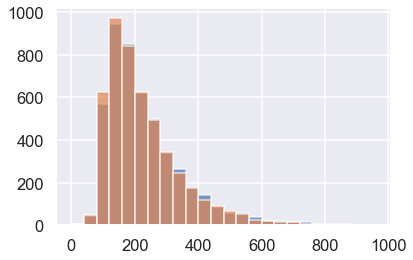

In [30]:
bins = np.arange(0, 1000, 40)

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

#remove quotes
data["Textstelle"] = data.Textstelle.str.replace('"', '')
data["Textstelle"] = data.Textstelle.str.replace("'", '')
data["Textstelle"] = data.Textstelle.str.replace(r'»', '')
data["Textstelle"] = data.Textstelle.str.replace(r'«', '')
data["Textstelle"] = data.Textstelle.str.replace(r'„', '')
data["Textstelle"] = data.Textstelle.str.replace(r'“', '')

# remove linebreak dashes
data["Textstelle"] = data.Textstelle.str.replace(r'— ', '')
data["Textstelle"] = data.Textstelle.str.replace(r'- ', '') # linebreak extension

# remove leading/trailing whitespace
data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")

#remove digits
data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')

# remove brackets:
data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\(', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\)', '')

# remove special characters
# YES, we remove dots. But they need to be added again at the end
#data["Textstelle"] = data.Textstelle.str.replace(r'.', '')
data["Textstelle"] = data.Textstelle.str.replace(r':', '')
data["Textstelle"] = data.Textstelle.str.replace(r';', '')
data["Textstelle"] = data.Textstelle.str.replace(r'—', '')
data["Textstelle"] = data.Textstelle.str.replace(r'-', '')
data["Textstelle"] = data.Textstelle.str.replace(r'_', '')

# make sure Commas come after a word:
data["Textstelle"] = data.Textstelle.str.replace(r' ,', ',')

# Roman numerals
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,3}V{0,1}I{0,3} ', "")
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,1}X{1,2}I{0,3} ', "")


data["Kürzungen"] = 0
for i in range(6):
    new_data = data["Textstelle"].apply(eliminate_substring)
    data["Kürzungen"] += (data["Textstelle"] != new_data)
    data["Textstelle"] = new_data

data.drop("Kürzungen", axis=1, inplace=True)
    
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

# Embedd all Textstellen and compare the leftovers to existing ones by using cosine

In [31]:
from sentence_transformers import SentenceTransformer

model_name = "distiluse-base-multilingual-cased-v2"

model = SentenceTransformer(model_name)

In [32]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

sentences = data.Textstelle

X = model.encode(sentences)

M = 1-pairwise_distances(X, metric="cosine")
M

array([[ 1.        ,  0.01425314,  0.0724231 , ...,  0.08270299,
         0.10511202,  0.17663682],
       [ 0.01425314,  1.        ,  0.09044886, ...,  0.10697353,
        -0.02832651,  0.08915371],
       [ 0.0724231 ,  0.09044886,  1.        , ...,  0.10182607,
         0.13066077,  0.06856871],
       ...,
       [ 0.08270299,  0.10697353,  0.10182607, ...,  1.        ,
         0.22799933,  0.1191563 ],
       [ 0.10511202, -0.02832651,  0.13066077, ...,  0.22799933,
         1.        ,  0.15933585],
       [ 0.17663682,  0.08915371,  0.06856871, ...,  0.1191563 ,
         0.15933585,  1.        ]], dtype=float32)

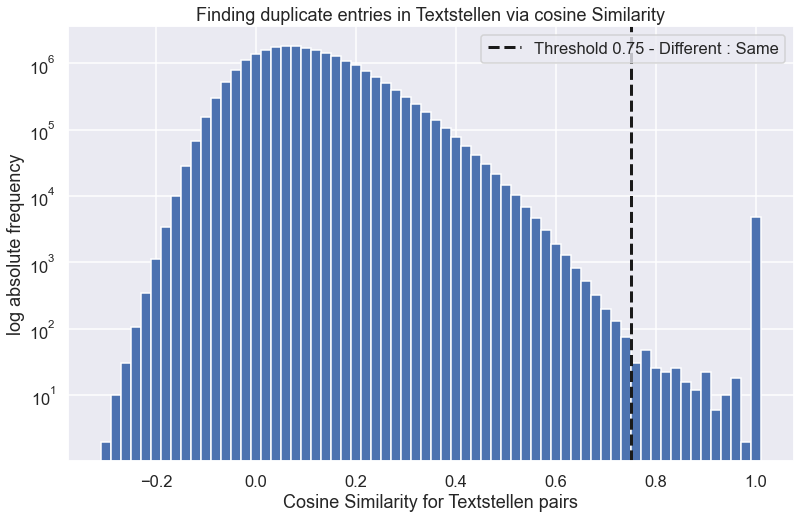

In [53]:
thrsh = 0.75

plt.figure(figsize=(13, 8))
plt.hist(M.reshape(-1),
         bins=np.arange(-0.32, 1.02, 0.02)+0.01)
plt.yscale("log")
plt.title("Finding duplicate entries in Textstellen via cosine Similarity")
plt.xlabel("Cosine Similarity for Textstellen pairs")
plt.ylabel("log absolute frequency")
plt.axvline(thrsh, lw=3, ls="--", c="k", label=f"Threshold {thrsh} - Different : Same");
plt.legend();

In [54]:
np.sum((M.reshape(-1) > thrsh) & (M.reshape(-1) < 1))

252

In [56]:
for idx in range(len(data)):
    
    new_indices = M[idx]
    new_indices = new_indices.argsort()
    new_indices = new_indices[::-1]
    
    for new_idx in new_indices:
        
        # only look at pairs once
        if idx >= new_idx:
            continue
            
        # once the entries are no longer similar, continue
        if M[idx, new_idx] < thrsh:
            continue
            
        print("TEXTSTELLE:")
        print(data.loc[idx, "Textstelle"])
        print("ÄHNLICHE TEXTSTELLEN:")

        print(M[idx, new_idx].round(3))
        print(data.loc[new_idx, "Textstelle"])
        print(idx, new_idx)
        
        #if input("\tDOES THIS MATCH?").lower() == "y":
        #    print(idx, new_idx)
        #    print()
        #    break
        print()

TEXTSTELLE:
Aber noch ist die Zeit nicht gekommen, zu verlangen, daß nunmehr die nationalstaatlichen Schranken überhaupt eingerissen werden müßten. Die Nationen sind noch Realitäten, und die Verschiedenheit ihrer Bedürfnisse und ihres Rechtsgefühls, sowie die Abneigung und Fremdheit der Angehörigen verschiedener Nationen ist auch eine Realität.
ÄHNLICHE TEXTSTELLEN:
0.846
Die Nationen sind noch Realitäten, und die Verschiedenheit ihrer Bedürfnisse und ihres Rechtsgefühls, sowie die Abneigung und Fremdheit der Angehörigen verschiedener Nationen ist auch eine Realität.
15 1923

TEXTSTELLE:
Angriffe gegen den Staat sind schließlich auch von denjenigen erhoben worden, welche das im modernen Staat gipfelnde Gesellschaftsleben für ein der Menschheit verderbliches Kunstprodukt halten und demgegenüber die Rückkehr zur Natur fordern ein Gedanke, der bekanntlich in Rousseau seinen glänzendsten Vertreter hatte.
ÄHNLICHE TEXTSTELLEN:
0.806
Nicht mit Unrecht fragt übrigens Riehl Der Übermensch kann

TEXTSTELLE:
Nur soweit ein Bedürfnis gebieterisch Befriedigung verlangt, existiert eine organisierte menschliche Tätigkeit und nur auf diesem Gebiete existiert ein Fortschritt, eine geschichtliche Entwickelung.
ÄHNLICHE TEXTSTELLEN:
1.0
Nur soweit ein Bedürfnis gebieterisch Befriedigung verlangt, existiert eine organisierte menschliche Tätigkeit und nur auf diesem Gebiete existiert ein Fortschritt, eine geschichtliche Entwickelung.
241 3482

TEXTSTELLE:
Obgleich jedes Id sämtliche zur Entwicklung eines Individuums gehörende Anlagen enthält, so ist doch die Prägung eines neuen Individuums nicht einem einzelnen von ihnen anvertraut, sondern wird durch das Zusammenund teilweise auch Entgegenwirken mehrerer Ide von individueller Verschiedenheit bestimmt. Nicht das monarchische Prinzip herrscht hier, sondern es regiert die Resultante aus konkurrierenden Kräften.
ÄHNLICHE TEXTSTELLEN:
0.819
J Obgleich jedes Jd sämtliche zur Entwicklung eines Individuums gehörende Anlagen enthält, so ist doch

TEXTSTELLE:
Aber dies kann nur den Sinn haben, daß die wahre Wissenschaft keine Sonderinteressen, d. h. nicht die Interessen einzelner Menschen oder Parteien verfolgt.
ÄHNLICHE TEXTSTELLEN:
0.772
Damit ist aber nicht gesagt, daß die Wissenschaft überhaupt keine Interessen verfolge, vielmehr beruht die Existenz jeder Wissenschaft auf der Voraussetzung, daß sie dem Menschen als solchem von Nutzen ist.
640 1261

TEXTSTELLE:
Aber diese Annahme ist bei Stammler lediglich durch eine falsche Bestimmung der Aufgabe dieser zwei Wissenschaften bedingt die Sozialphilosophie soll von der Gesetzmäßigkeit des sozialen Lebens und die allgemeine Rechtslehre von dem Wesen einzelner gegebener Rechtsordnungen handeln nun kann es aber eine solche Wissenschaft wie die letztere nicht geben und daß Stammler diesen Inhalt nicht als Teil  Eleutheropnlos.
ÄHNLICHE TEXTSTELLEN:
0.755
Aufl., S.  hat Recht, wenn es die Aufgabe einer Rechtslehre dahin bestimmt, daß es sich um eine Ergänzung der juristischen Teilwis

TEXTSTELLE:
Der Satz die nördlicherelis hellfarbigen Bären sind räumlich von den südlicheren dunkleren geschieden worden und haben sich infolge davon der Paarung mit den dunkleren elliwöhnt, wäre zu ersetzen durch den andern Satz die helleren Bären haben zugleich mit ihrer helleren Färbung eine Abneigung gegen Paarung All dunkleren erworben und das hat die Scheidung in zwei Arten zur Folge gehabt.
ÄHNLICHE TEXTSTELLEN:
0.799
worden und haben sich infolge davon der Paarung mit den dunkleren entwöhut, wäre zu ersetzen durch den andern Satz die helleren Bären habe zugleich mit ihrer helleren Färbung eine Abneigung gegen Paarung.
1659 4658

TEXTSTELLE:
Der Wettkampf der Völker, mit besonderer Bezugnahme auf Deutschland und die Vereinigten Staaten von Amerika von Emil Schalk in NewYork Der Verf., geb.
ÄHNLICHE TEXTSTELLEN:
0.95
Der Wettkampf der Völker, mit besonderer Bezugnahme aus Deutschland und die Vereinigten Staaten Donlordameriha von Emil Schalk in NewYork.
1679 1681

TEXTSTELLE:
Der

TEXTSTELLE:
Eine sammlung von Preissairisten öerausgegeben von Prof. Dr. B. S. Ziegler in Verbindung mit prof. Dr. Sonraci und prof. Dr. ökonomie.
ÄHNLICHE TEXTSTELLEN:
0.768
Eine sammlung von preisscliristenz Herausgegeben von prof. P. S. S. Ziegler in Verbindung mit Drob Dr. Sonraa und Drob Dr. Saeclrel Erster Teil.
2456 2457

TEXTSTELLE:
Eleutheropolus, Wirtschaft und Philosophie II, die Philosophie und die Lebensauffassung der germanischromanischen Völker, S.  ff.
ÄHNLICHE TEXTSTELLEN:
0.833
Wirtschaft und Philosophie, I s Griechentums,  II Die Philosophie und die Lebensauffassung der germanischen Völker, 
2475 4274

TEXTSTELLE:
Erstes Buch Können die Prinzipien der Descendenztheorie akts die innerpolitische Entwickelung und Gesetzgebung der Staaten angewandt werden?
ÄHNLICHE TEXTSTELLEN:
0.894
Zweites Buch Müssen die Prinzipien der Descendenztheorie auf  die innerpolitische Entwickelung und Gesetzgebung der Staaten angewandt werden?
2536 4380

TEXTSTELLE:
Erstes Buch Können die Pr

TEXTSTELLE:
Mit dieser Tatsache, daß die Sozialwissenschaft die Erscheinungen des menschlichen Zusammenlebens lediglich nach der Seite ihrer äußerlichen Regelung betrachtet, hängt es zusammen, daß in ihr die naturwissenschaftliche Frage nach der Ursache keine Anwendung finden kann.
ÄHNLICHE TEXTSTELLEN:
0.775
Überall zeigt sich also, daß solche Erscheinungen des gesellschaftlichen Zusammenlebens der Menschen, die an sich dern, nach der Ursache fragenden Betrachtung zugänglich sind, bei dieser Betrachtungsweise stets rein naturwissenschaftliche Erscheinungen bleiben und nie sozialwissenschaftliche Dignität erlangen.
3344 4726

TEXTSTELLE:
Philosophie der Anpassung von Heinrich Matzat, Direktor der Landwirtschaftsschule in Weilburg an der Lahn.
ÄHNLICHE TEXTSTELLEN:
0.768
Verfasser Heinrich Matzat, Direktor der Laudwirtschaftsschule in Weilburg a. d. Lohn Abhandlung mit dem Motto Ich habs gewagt.
3525 3934

TEXTSTELLE:
Seine Annahme daß die Träger einer Abänderung mit * Woher Haufen dies

TEXTSTELLE:
Geschlecht von gestern, die Lebenden an die Toten, und statt wie andere Völker in die Morgenröte der Zukunft zu schauen und hoffnungsvoll hineinzuwandern in eine kommende bessere Zeit, steht das chinesische Volk und starrt in das Dunkel der Vergangenheit
ÄHNLICHE TEXTSTELLEN:
0.905
So band er das Geschlecht von heute an das vergangene Geschlecht von gestern, die Lebenden an die Toten, und statt wie andere Völker in die Morgenröte der Zukunft zu schauen und hoffnungsvoll hineinzuwandern in eine kommende bessere Zeit, steht das chinesische Volk und starrt in das Dunkel der Vergangenheit.
4400 4429

TEXTSTELLE:
Sittlichkeit und Organisation des sozialen Lebens materielle Entwicklungsmomente und Organisation.
ÄHNLICHE TEXTSTELLEN:
0.939
Formen des sozialen LebensDie sittlichen Inhalte und die Organisation und die materiellen Entwicklungsmoniente.
4709 4764

TEXTSTELLE:
Die Lehre von einem Gesamtwillen und der Wille im sozialen Leben und die Ansicht von einem allgemeinen Willen,

In [13]:
data.loc[54, ["Metapher", "Kandidat"]] += data.loc[53, ["Metapher", "Kandidat"]]
data.loc[76, ["Metapher", "Kandidat"]] += data.loc[75, ["Metapher", "Kandidat"]]
data.loc[142, ["Metapher", "Kandidat"]] += data.loc[141, ["Metapher", "Kandidat"]]
data.loc[473, ["Metapher", "Kandidat"]] += data.loc[472, ["Metapher", "Kandidat"]]
data.loc[508, ["Metapher", "Kandidat"]] += data.loc[509, ["Metapher", "Kandidat"]]
data.loc[645, ["Metapher", "Kandidat"]] += data.loc[644, ["Metapher", "Kandidat"]]
data.loc[793, ["Metapher", "Kandidat"]] += data.loc[764, ["Metapher", "Kandidat"]]




In [14]:
data.drop([53, 75, 141, 472, 509, 644, 764], inplace=True)
data.drop(columns = "index", inplace=True)
data.reset_index(inplace=True)
data.drop(columns = "index", inplace=True)
data.reset_index(inplace=True)
data

,index,Textstelle,Metapher,Kandidat,Fokus,Rahmen,orig
0,0,"""Der politische Körper verwendet in beiden Fä...",2,1,Zähnen und Krallen,der politische Körper,"""Der politische Körper verwendet in beiden Fä..."
1,1,"""Immer noch wird durch die protestantische Le...",0,3,NaN,NaN,"""Immer noch wird durch die protestantische Le..."
2,2,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",0,3,NaN,NaN,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v..."
3,3,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal,"""Mit je weiterem Blick wir die Stoffwelt zu ü..."
4,4,"""Solange das Menschengeschlecht seinen Zerstö...",0,3,NaN,NaN,"""Solange das Menschengeschlecht seinen Zerstö..."
...,...,...,...,...,...,...,...
794,794,verlaufs; sie hat Naturforschung in dem von un...,0,3,NaN,NaN,verlaufs; sie hat Naturforschung in dem von un...
795,795,wenn wir uns ein Prinzip denken und auf Grund ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse,wenn wir uns ein Prinzip denken und auf Grund ...
796,796,wenn wir von dem schlechten Worte »Rechtsphilo...,2,1,schwindsüchtig ist,daß eine Philosophie,wenn wir von dem schlechten Worte »Rechtsphilo...
797,797,"»Die Macht, die das Kabinett hat, auf die vers...",0,2,NaN,NaN,"»Die Macht, die das Kabinett hat, auf die vers..."


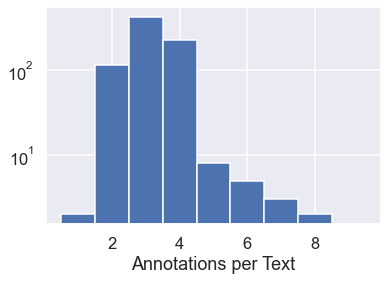

In [15]:
data[["Metapher", "Kandidat"]].sum(axis=1).hist(bins = np.arange(0,10,1)+0.5);
plt.yscale("log")
plt.xlabel("Annotations per Text");

# Now we clean

In [16]:
def eliminate_substring(text, k=22):
    for ii in range(len(text)):
        remaining_text = text[ii:]
        
        jj = k
        while remaining_text[:jj] in remaining_text[jj:]:

            jj+=1
        if jj > k:
            #print(jj)
            return text[:ii] + remaining_text[jj-1:]
    # if we find no substring, just give the text back
    return text

262.3028785982478


/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_22304/3153716324.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_22304/3153716324.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_22304/3153716324.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_22304/3153716324.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
/var/folders/j4/qmf6qmvd1gv0nct

240.93241551939926


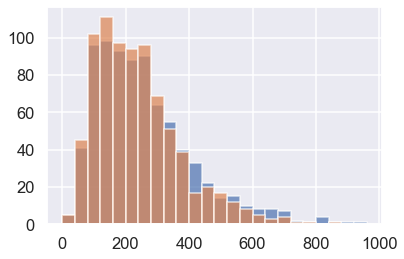

In [17]:
bins = np.arange(0, 1000, 40)

data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

#remove quotes
data["Textstelle"] = data.Textstelle.str.replace('"', '')
data["Textstelle"] = data.Textstelle.str.replace("'", '')
data["Textstelle"] = data.Textstelle.str.replace(r'»', '')
data["Textstelle"] = data.Textstelle.str.replace(r'«', '')
data["Textstelle"] = data.Textstelle.str.replace(r'„', '')
data["Textstelle"] = data.Textstelle.str.replace(r'“', '')

# remove leading/trailing whitespace
data["Textstelle"] = data.Textstelle.str.replace(r'^\s*', "")
data["Textstelle"] = data.Textstelle.str.replace(r'\s\s*', " ")
data["Textstelle"] = data.Textstelle.str.replace(r'[ \t]+$', "")

#remove digits
data["Textstelle"] = data.Textstelle.str.replace(r'\d\.', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\d', '')

# remove brackets:
data["Textstelle"] = data.Textstelle.str.replace(r'\[', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\]', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\(', '')
data["Textstelle"] = data.Textstelle.str.replace(r'\)', '')

# remove special characters
# YES, we remove dots. But they need to be added again at the end
#data["Textstelle"] = data.Textstelle.str.replace(r'.', '')
data["Textstelle"] = data.Textstelle.str.replace(r':', '')
data["Textstelle"] = data.Textstelle.str.replace(r';', '')
data["Textstelle"] = data.Textstelle.str.replace(r'— ', '')
data["Textstelle"] = data.Textstelle.str.replace(r'—', '')
data["Textstelle"] = data.Textstelle.str.replace(r'- ', '') # linebreak extension
data["Textstelle"] = data.Textstelle.str.replace(r'-', '')
data["Textstelle"] = data.Textstelle.str.replace(r'_', '')

# make sure Commas come after a word:
data["Textstelle"] = data.Textstelle.str.replace(r' ,', ',')

# Roman numerals
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,3}V{0,1}I{0,3} ', "")
data["Textstelle"] = data.Textstelle.str.replace(r'^I{0,1}X{1,2}I{0,3} ', "")


data["Kürzungen"] = 0
for i in range(6):
    new_data = data["Textstelle"].apply(eliminate_substring)
    data["Kürzungen"] += (data["Textstelle"] != new_data)
    data["Textstelle"] = new_data

data.drop("Kürzungen", axis=1, inplace=True)
    
data["Textstelle"].str.len().hist(bins=bins, alpha = 0.7);
print(data["Textstelle"].str.len().mean())

In [18]:
import os

cwd = os.getcwd()
folder = "clean+translated-data"
file = "clean-de.csv"
path = "/".join( (cwd, folder, file) )

data = data.set_index("index")
data.to_csv(path)